# Lab work №4

In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

class ImproveImage():
    def __init__(self, img_name: str) -> None:
        self.image_name = img_name
        self.image = cv2.imread(img_name)
        self.image_black_white = cv2.imread(img_name, 0)
        

    def show_image(self, size=(700, 600)):
        img = cv2.resize(self.image, size)
        cv2.imshow(self.image_name, img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_default_image_hist(self):
        plt.hist(self.image.ravel(), 256, [0, 256])
        plt.show()

    def plot_hist_with_mask(self, x1, x2, y1, y2):
        img = self.image
        mask = np.zeros(img.shape[:2], np.uint8)
        mask[x1:x2, y1:y2] = 255
        hist_default = cv2.calcHist([img], [0], None, [256], [0, 256])
        hist_with_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

        mask_image = cv2.bitwise_and(img, img, mask=mask)

        plt.subplot(221)
        plt.imshow(mask_image, 'gray')
        plt.subplot(222)
        plt.plot(hist_default)
        plt.plot(hist_with_mask)
        plt.xlim([0, 256])
        plt.show()

    def norm_build_hist(self, range):
        normalized_img = cv2.normalize(self.image_black_white, None, range[0], range[1], cv2.NORM_MINMAX)
        equalize = cv2.equalizeHist(normalized_img)
        res = np.hstack((self.image_black_white, equalize))
        hist = cv2.calcHist([equalize], [0], None, [256], [0, 256])

        plt.subplot(221)
        plt.imshow(res)
        plt.subplot(222)
        plt.plot(hist)
        plt.xlim([0, 256])
        plt.show()

        return res

    def save_to_file(self, result, name="result.jpg"):
        cv2.imwrite(name, result)

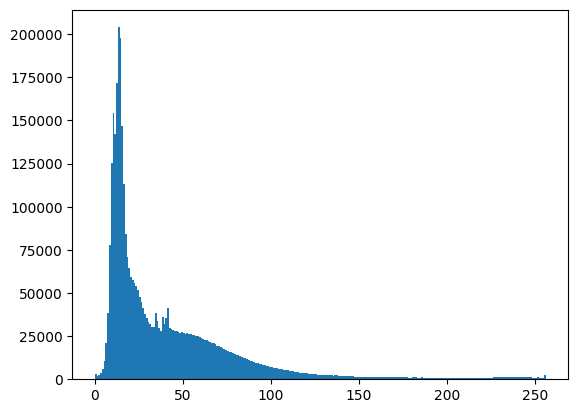

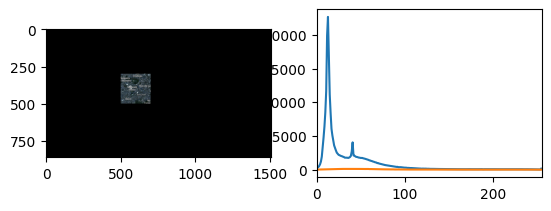

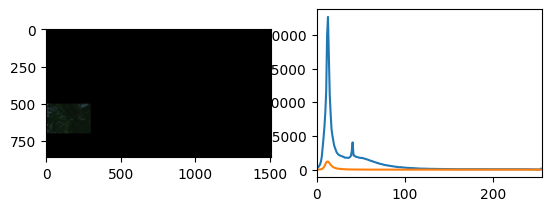

In [74]:
improve = ImproveImage('Sentinel-2_L2A_True_Color_Brazil.jpg')
improve.show_image()
improve.show_default_image_hist()
improve.plot_hist_with_mask(300, 500, 500, 700)
improve.plot_hist_with_mask(500, 700, 0, 300)

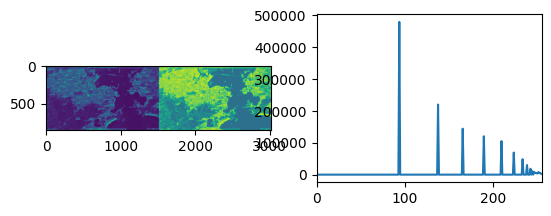

In [75]:
normed_result = improve.norm_build_hist((60, 80))

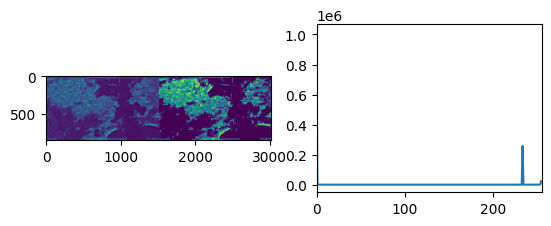

In [76]:
normed_result = improve.norm_build_hist((68, 70))
improve.save_to_file(normed_result, 'Sentinel-2_L2A_True_Color_Brazil_Result.jpg')

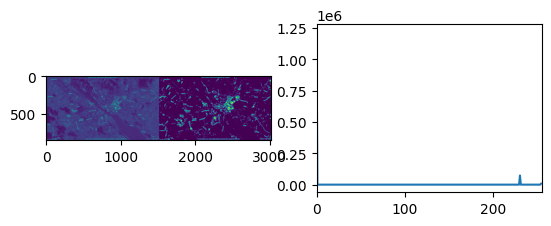

In [77]:
slovenia = ImproveImage('Sentinel-2_L2A_True_Color_Slovenia.jpg')
normed_result = slovenia.norm_build_hist((68, 70))
improve.save_to_file(normed_result, 'Sentinel-2_L2A_True_Color_Slovenia_Result.jpg')

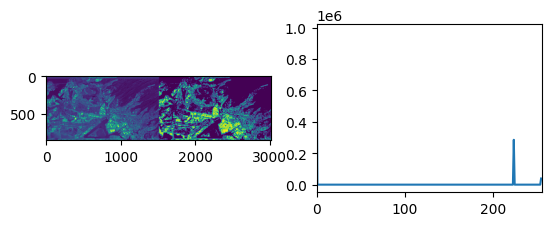

In [78]:
hawaii = ImproveImage('Sentinel-2_L2A_True_Color_Hawaii.jpg')
normed_result = hawaii.norm_build_hist((68, 70))
improve.save_to_file(normed_result, 'Sentinel-2_L2A_True_Color_Hawaii_Result.jpg')